# Auto credit card approval - case study description

<p>This case study focuses on building an automatic credit card approval predictor using machine learning. The Credit Approval Data Set from the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval"> UCI Machine Learning Repository </a>is used as an example dataset to demonstrate the methodology. Although the features labels are sanitized to maintain anonymity, expert opinions suggest that the feature labels may be: <code>Gender, Age, Debt, Married_status, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, NoPriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income</code> and <code> ApprovalStatus.</code></p>

<p>Credit card approval is a perfect case study for applied machine learning since the application approval process can be easily framed as a classification problem. The underlying pattern that differentiates between trustworthy customers and unreliable customers can be ascertained through the customer's credit and personal details. The conventional system for approvals were subjective and based on the bank manager's experience. Using machine learning, this subjective judgement can be supplemented with quantitave metrics that can lead to faster and more accurate approval processes. </p>

<p> This analysis will involve data pre-processing and cleaning followed by an exploratory analysis. Pre-processing is reqired to deal with the missing values and prepping the dataset for use in machine learning libraries. After some exploratory analysis, we'll build a pipeline that will test several machine learning models including a deep neural network and their predictors for the credit card applications.</p>  


<p><sub>Sources:</sub><br>    
<sub>Data: Credit Approval Data Set, UCI Machine Learning Repository</sub><br>
<sub>Project: Sayak Paul, Predicting Credit Card Approvals, Datacamp </sub></p>


In [1]:
#from IPython.core.debugger import set_trace
#Original dataset
import pandas as pd
import numpy as np

df = pd.read_csv('../dat/cc_approvals.data',header=None,na_values='?')
cc_col_details=['Gender', 'Age', 'Debt', 'Married_status', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'NoPriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income' ,  'ApprovalStatus']
df.columns = cc_col_details 
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            678 non-null object
Age               678 non-null float64
Debt              690 non-null float64
Married_status    684 non-null object
BankCustomer      684 non-null object
EducationLevel    681 non-null object
Ethnicity         681 non-null object
YearsEmployed     690 non-null float64
NoPriorDefault    690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           677 non-null float64
Income            690 non-null int64
ApprovalStatus    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


,Gender,Age,Debt,Married_status,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,NoPriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


## Data cleaning and pre-processing
As can be seen, the dataset requires some cleaning before it can be used for any exploratory analysis. 

In [2]:
def convert_cat_cols(df,cat_var_limit=10,verbose=False):
    """
    Converts columns with a small amount of unique values that are of
    type Object into categorical variables
    """
    temp_var = df.apply(lambda x: len(x.value_counts())<cat_var_limit)
    temp_var2 = df.apply(lambda x: x.value_counts().index.dtype == 'O')
    df[temp_var[temp_var2].index] = df[temp_var[temp_var2].index].astype('category')
    if verbose:
        print(df[temp_var[temp_var2].index].describe())
    return df

def impute_most_freq(df):
    """
    Imputes the most frequent value in place of NaN's
    """
    temp_var = df.apply(lambda x: x.value_counts().index[0])
    return df.fillna(temp_var)


df = pd.read_csv('../dat/cc_approvals.data',header=None,na_values='?')
df.columns = cc_col_details
df = convert_cat_cols(df,10).fillna(df.median())
df = impute_most_freq(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null category
Age               690 non-null float64
Debt              690 non-null float64
Married_status    690 non-null category
BankCustomer      690 non-null category
EducationLevel    690 non-null category
Ethnicity         690 non-null category
YearsEmployed     690 non-null float64
NoPriorDefault    690 non-null category
Employed          690 non-null category
CreditScore       690 non-null int64
DriversLicense    690 non-null category
Citizen           690 non-null category
ZipCode           690 non-null float64
Income            690 non-null int64
ApprovalStatus    690 non-null category
dtypes: category(10), float64(4), int64(2)
memory usage: 41.1 KB


All data cleaning is done. Next step is to perform preprocessing of the dataset for insertion into the SciKit library functions which require numeric values. We'll convert our dataset into a binary integer representation using pd.get_dummies as well as a 0 - n_class-1 integer representation using the Scikit Transformer LabelEncoder

In [3]:
from sklearn.preprocessing import LabelEncoder

def convert_str_int_labels(df):
    """
    Converts columns with strings (class labels) into integer representation
    """
    for col in df.columns:
        le = LabelEncoder()
        df.loc[:,col]=le.fit_transform(df.loc[:,col])
    return df

df_bin = pd.get_dummies(df,drop_first=True)
df.loc[:,df.columns[df.dtypes=='category']]=\
convert_str_int_labels(df.loc[:,df.columns[df.dtypes=='category']])

print(df_bin.head())
df.head()


#for i in df.columns:
#    print(df[i].value_counts(dropna=False))
#    print('\n')
#df.head()

     Age   Debt  YearsEmployed  CreditScore  ZipCode  Income  Gender_b  \
0  30.83  0.000           1.25            1    202.0       0         1   
1  58.67  4.460           3.04            6     43.0     560         0   
2  24.50  0.500           1.50            0    280.0     824         0   
3  27.83  1.540           3.75            5    100.0       3         1   
4  20.17  5.625           1.71            0    120.0       0         1   

   Married_status_u  Married_status_y  BankCustomer_gg  ...  Ethnicity_n  \
0                 1                 0                0  ...            0   
1                 1                 0                0  ...            0   
2                 1                 0                0  ...            0   
3                 1                 0                0  ...            0   
4                 1                 0                0  ...            0   

   Ethnicity_o  Ethnicity_v  Ethnicity_z  NoPriorDefault_t  Employed_t  \
0            0          

,Gender,Age,Debt,Married_status,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,NoPriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0


## Splitting into train and test sets with auto feature selection
<p>With all numeric data, the next data-prep step will be to split the data into a training set and testing set. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.</p>
<p> We will also performs feature selection on the dataframe. Feature selection is performed using the LASSO weight shrinking process. Features with coefficients that are around 0 are then rejected.</p>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

def feat_select(df,test_size_var=0.3,alpha_val=0.08,random_state_var=21,use_feat_select=True,plot=True):
    """
    Performs feature selection on a dataframe with a single target variable and n features. 
    Test train split is also performed and only splits of selected features are returned.
    Feature selection performed using LASSO weight shrinking
    """
    x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1]\
                                                        ,test_size=test_size_var, random_state=random_state_var\
                                                        ,stratify=df.iloc[:,-1])
    if use_feat_select:
        param_grid = {'alpha': np.linspace(0.01,0.02,20)}
        lasso_gcv = GridSearchCV(Lasso(normalize=False),param_grid,cv=5,n_jobs=-1,iid=True)
        lasso_coeffs = lasso_gcv.fit(x_train, y_train).best_estimator_.coef_
        if plot:
            plt.barh(y=range(len(df.columns[:-1])),width=np.abs(lasso_coeffs)\
                    ,tick_label=df.columns[:-1].values,)
            plt.ylabel('Column features')
            plt.xlabel('Coefficient score')
            plt.xticks(rotation=90)
            plt.show()
        select_feats = df.columns[:-1][np.abs(lasso_coeffs) > 0].values
        x_train = x_train.loc[:,select_feats]
        x_test = x_test.loc[:,select_feats]
    return x_train.values, x_test.values, y_train.values, y_test.values


#x_train, x_test, y_train, y_test = feat_select(df,use_feat_select=True,plot=True)

## Creating a transformation and analysis pipeline

The dataset can now be rescaled so that no feature can artificially bias the analysis. In this case, no specialized feature engineering is performed and all the feature variables will be rescaled broadly. <br>
Both the binary integer representation and the non-binary integer representation will be tested. <br>
<strong> Note 1: better scores can be expected from intelligently rescaling the data. For example, age can be standardized while credit scores can be rescaled between 0 and -1. This will be implemented in the future. <br>
Note 2: The above preprocessing functions can be integrated into the pipeline ibject using FunctionTransformer. This will be implemented in the future. 
</strong>

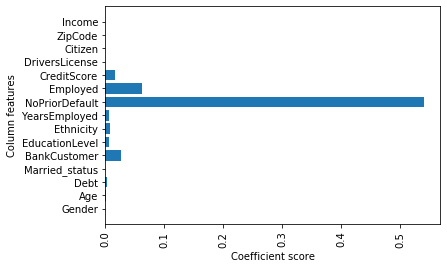


Analysis for : logreg
{'logreg__C': 0.8}
   mean_test_score              params
0         0.859213  {'logreg__C': 0.8}
1         0.859213    {'logreg__C': 1}
2         0.857143  {'logreg__C': 1.2}
3         0.857143  {'logreg__C': 1.4}
The score for logreg is 0.8743961352657005

Analysis for : knnstep
{'knnstep__n_neighbors': 8}
    mean_test_score                        params
0          0.842650   {'knnstep__n_neighbors': 3}
1          0.836439   {'knnstep__n_neighbors': 4}
2          0.846791   {'knnstep__n_neighbors': 5}
3          0.853002   {'knnstep__n_neighbors': 6}
4          0.855072   {'knnstep__n_neighbors': 7}
5          0.857143   {'knnstep__n_neighbors': 8}
6          0.857143   {'knnstep__n_neighbors': 9}
7          0.846791  {'knnstep__n_neighbors': 10}
8          0.850932  {'knnstep__n_neighbors': 11}
9          0.844720  {'knnstep__n_neighbors': 12}
10         0.846791  {'knnstep__n_neighbors': 13}
11         0.850932  {'knnstep__n_neighbors': 14}
12         0.85300

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = feat_select(df,use_feat_select=True,plot=True)

steps = ('Scaler', MinMaxScaler(feature_range=(-1, 1)))
steps_norm = ('Scaler', Normalizer())
steps_stand = ('Scaler', StandardScaler())

classifiers = [('logreg',LogisticRegression(solver='lbfgs')),\
        ('knnstep',KNeighborsClassifier()),\
        ('svcstep',SVC(gamma='scale')),\
         ('gradbooststep',GradientBoostingClassifier(subsample=.8))     ]

parameters = { 'logreg':{'logreg__C' : [0.8,1,1.2,1.4]} ,\
              'knnstep':{'knnstep__n_neighbors':np.arange(3,16)},\
              'svcstep':{'svcstep__C': [0.5,1,1.5,2,2.5,2.6]},\
             'gradbooststep':{'gradbooststep__max_depth': [2,3,4,5],'gradbooststep__n_estimators': [40,60,80,100]}} 

trained_models = []

for clf in classifiers:
    pipeline = Pipeline([steps,clf])
    print('\nAnalysis for : '+clf[0])
    gcv = GridSearchCV(pipeline,param_grid = parameters[clf[0]],cv=5,iid=True)
    gcv.fit(x_train,y_train)
    trained_models.append(gcv)
    print(gcv.best_params_)
    print(pd.DataFrame(gcv.cv_results_)[['mean_test_score','params']])
    print('The score for '+ clf[0] +' is '+ str(gcv.score(x_test,y_test))) 
    
#trained_models[0].predict(x_test)   #testing using the logreg model

A similar analysis will now be done on the binary integer representation dataset.

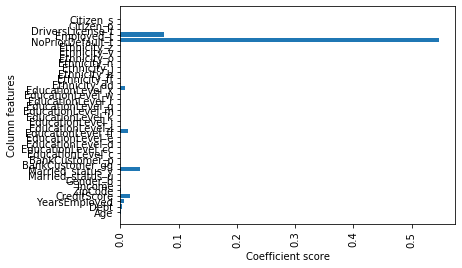


Analysis for : logreg
{'logreg__C': 1.4}
   mean_test_score              params
0         0.857143  {'logreg__C': 0.8}
1         0.859213    {'logreg__C': 1}
2         0.859213  {'logreg__C': 1.2}
3         0.861284  {'logreg__C': 1.4}
The score for logreg is 0.8888888888888888

Analysis for : knnstep
{'knnstep__n_neighbors': 9}
    mean_test_score                        params
0          0.840580   {'knnstep__n_neighbors': 3}
1          0.832298   {'knnstep__n_neighbors': 4}
2          0.846791   {'knnstep__n_neighbors': 5}
3          0.838509   {'knnstep__n_neighbors': 6}
4          0.848861   {'knnstep__n_neighbors': 7}
5          0.840580   {'knnstep__n_neighbors': 8}
6          0.859213   {'knnstep__n_neighbors': 9}
7          0.848861  {'knnstep__n_neighbors': 10}
8          0.850932  {'knnstep__n_neighbors': 11}
9          0.844720  {'knnstep__n_neighbors': 12}
10         0.855072  {'knnstep__n_neighbors': 13}
11         0.850932  {'knnstep__n_neighbors': 14}
12         0.85093

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = feat_select(df_bin,use_feat_select=True,plot=True)

steps = ('Scaler', MinMaxScaler(feature_range=(-1, 1)))
steps_norm = ('Scaler', Normalizer())
steps_stand = ('Scaler', StandardScaler())


classifiers = [('logreg',LogisticRegression(solver='lbfgs')),\
        ('knnstep',KNeighborsClassifier()),\
        ('svcstep',SVC(gamma='scale')),\
         ('gradbooststep',GradientBoostingClassifier(subsample=.8))     ]

parameters = { 'logreg':{'logreg__C' : [0.8,1,1.2,1.4]} ,\
              'knnstep':{'knnstep__n_neighbors':np.arange(3,16)},\
              'svcstep':{'svcstep__C': [0.5,1,1.5,2,2.5,2.6]},\
             'gradbooststep':{'gradbooststep__max_depth': [2,3,4,5],'gradbooststep__n_estimators': [40,60,80,100]}} 

trained_models = []

for clf in classifiers:
    pipeline = Pipeline([steps,clf])
    print('\nAnalysis for : '+clf[0])
    gcv = GridSearchCV(pipeline,param_grid = parameters[clf[0]],cv=5,iid=True)
    gcv.fit(x_train,y_train)
    trained_models.append(gcv)
    print(gcv.best_params_)
    print(pd.DataFrame(gcv.cv_results_)[['mean_test_score','params']])
    print('The score for '+ clf[0] +' is '+ str(gcv.score(x_test,y_test))) 
    
#trained_models[0].predict(x_test)   #testing using the logreg model

## Exploring Deep Neural Networks (DNNs) for classification
<p> In this particular case, it would seem that we do not have enough data to satisfactorily train a DNN. However, we will build a 6 layer DNN with a ramped layer node architecture for comparison with the <emph>'shallow'</emph> learning case.</p> The binary integer representation dataset will be used without feature selection to maximize data use.

In [22]:
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

x_train, x_test, y_train, y_test = feat_select(df_bin,use_feat_select=False,plot=False)

steps = ('Scaler', MinMaxScaler(feature_range=(-1, 1)))
steps_norm = ('Scaler', Normalizer())
steps_stand = ('Scaler', StandardScaler())

scaler = steps[1]
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

n_cols = x_train.shape[-1]

model = Sequential()
model.add(Dense(5, activation = 'relu', input_shape=(n_cols,)))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(2,activation='softmax'))

early_stop_monitor  = EarlyStopping(patience =2)
model.compile (optimizer = 'adam',\
               loss= 'categorical_crossentropy',metrics=['accuracy'])
train_dp_model=model.fit(x_train, pd.get_dummies(y_train).values,\
                        validation_split = .2, epochs = 20, callbacks =[early_stop_monitor],\
                        verbose=True)
print('Loss metrics: '+str(train_dp_model.history['loss'][-1]))

pred_prob = model.predict(x_test)
accuracy_dp = np.sum((pred_prob[:,1] >= 0.5) == y_test)/len(y_test)
print('Testing accuracy: '+str(accuracy_dp))

Train on 386 samples, validate on 97 samples
Epoch 1/20
386/386 [==============================] - 3s 8ms/step - loss: 0.6913 - acc: 0.5026 - val_loss: 0.6879 - val_acc: 0.6186
Epoch 2/20
386/386 [==============================] - 0s 202us/step - loss: 0.6783 - acc: 0.6813 - val_loss: 0.6805 - val_acc: 0.6392
Epoch 3/20
386/386 [==============================] - 0s 202us/step - loss: 0.6598 - acc: 0.7098 - val_loss: 0.6668 - val_acc: 0.6701
Epoch 4/20
386/386 [==============================] - 0s 202us/step - loss: 0.6245 - acc: 0.7409 - val_loss: 0.6314 - val_acc: 0.7113
Epoch 5/20
386/386 [==============================] - 0s 202us/step - loss: 0.5621 - acc: 0.7927 - val_loss: 0.5839 - val_acc: 0.7629
Epoch 6/20
386/386 [==============================] - 0s 202us/step - loss: 0.5076 - acc: 0.7876 - val_loss: 0.5640 - val_acc: 0.7732
Epoch 7/20
386/386 [==============================] - 0s 202us/step - loss: 0.4550 - acc: 0.8057 - val_loss: 0.5515 - val_acc: 0.7732
Epoch 8/20
386/386 

As we can see with results above, the accuracy of the DNN classifier appears to be quite close to the logistic regression classifier accuracy with minimal feature engineering and with comparatively very little data.

## Conclusion

This notebook shows the development of an analysis and machine learning pipeline for credit card application approval. The notebook also shows data cleaning and pre-processing of the data set prior to the analysis. <br>
Four shallow classifiers were tested with their hyperparameters tuned using a 5-fold cross-validated gridsearch. Additionally a 6 layer DNN classifier was also tested. The analysis showed that the logistic regression classifier trained on a binary integer representation dataset with feature selection outperformed the support vector, K-neighbours, gradient boosted, and DNN classifiers and exhibited a classification accuracy of around 89% on the test set. The DNN classifier exhibited second highest accuracy among these models. It should be noted that very minimal feature engineering was performed in this analysis. For better results, it is advised to engineer each feature column individually, especially features with high LASSO coefficient scores. 